In [1]:
import numpy as np
import math
from enum import Enum
from collections import namedtuple
# matplotlib
# ライブラリーのインポート
import matplotlib.pyplot as plt
# インライン表示
%matplotlib inline
# 日本語フォント
import pylab
from matplotlib.font_manager import FontProperties
# 日本語フォント
fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)

# 第四章　暖冷房設備

# 第二節　ダクト式セントラル空調機

## 5.　最大暖房出力

日付$d$の時刻$t$における1時間当たりの最大暖房出力$Q_{max,H,d,t}$は、式(1)により表される。

$$ 
\begin{equation*}
    Q_{max,H,d,t} = q_{rtd,H} \times C_{df,d,t} \times 3600 \times 10^{-6}
\end{equation*}
$$


<div style="text-align: right;"> (1) </div>

ここで、  

$Q_{max,H,d,t}$：日付$d$の時刻$t$における1時間当たりの最大暖房出力(MJ/h)  
$q_{rtd,H}$：定格暖房能力(W)  
$C_{df,d,t}$：日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数(-)  

である。

定格暖房能力$q_{rtd,H}$は、付録Aにより定まる。

In [2]:
def Q_max_H(q_rtd_H, C_df):
    '''最大暖房出力(MJ/h)を計算する'''
    # q_rtd_H: 定格暖房能力(W)
    # C_df: デフロストに関する暖房出力補正係数(-)

    return q_rtd_H * C_df * 3600 * 10**(-6)

日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数$C_{df,d,t}$は、外気温度$\theta_{ex,d,t}$が5℃未満かつ外気相対湿度$h_{ex,d,t}$が80%以上の場合にデフロストが発生すると仮定して、式(2)により定まる。

<p style="text-indent:2em">外気温度$\theta_{ex,d,t}$が5℃未満かつ外気相対湿度$h_{ex,d,t}$が80%以上の場合：</p>  
$$ 
\begin{equation*}
   C_{df,d,t} = 0.77
\end{equation*}
$$


<div style="text-align: right;"> (2-1) </div>

<p style="text-indent:2em">外気温度$\theta_{ex,d,t}$が5℃以上かつ外気相対湿度$h_{ex,d,t}$が80%未満の場合：</p>  
$$ 
\begin{equation*}
   C_{df,d,t} = 1.0
\end{equation*}
$$


<div style="text-align: right;"> (2-2) </div>

ここで、  

$C_{df,d,t}$：日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数(-)  
$h_{ex,d,t}$：日付$d$の時刻$t$における外気相対湿度(%)  
$\theta_{ex,d,t}$：日付$d$の時刻$t$における外気温度(℃)  

である。

In [3]:
def get_C_df(theta_ex, h_ex):
    '''デフロストに関する暖房出力補正係数(-)を取得する'''
    # theta_ex: 外気温度(℃)
    # h_ex: 外気相対湿度(%)
    
    if theta_ex < 5 and 80<= h_ex:
        return  0.77
    else:
        return  1.0

Example

In [4]:
np.vectorize(get_C_df)([[4],[5],[6]],[79,80,81])

array([[ 1.  ,  0.77,  0.77],
       [ 1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  ]])

In [5]:
Q_max_H(1000, get_C_df(20, 70))

3.5999999999999996

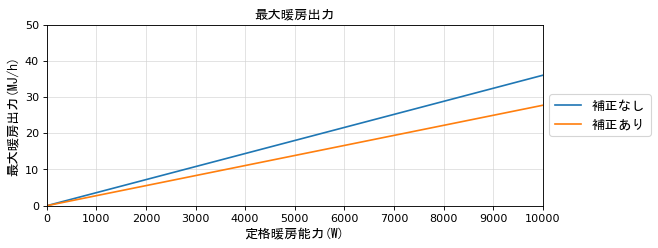

In [6]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('最大暖房出力', fontdict={'fontproperties':fp})

for i,category in enumerate(['補正なし','補正あり']):
    x_values =[x for x in range(0, 10000)]
    y_values = {'補正なし' :[Q_max_H(x, get_C_df(20, 70)) for x in x_values],
                '補正あり' :[Q_max_H(x, get_C_df( 0, 90)) for x in x_values]}[category]
    plt.plot(x_values, y_values, label=category)
        
ax=plt.gca()
ax.set_xlabel('定格暖房能力(W)', fontdict={'fontproperties':fp})
ax.set_xticks([x for x in range(0, 11000, 1000)], minor=False)
ax.set_xbound(lower=0, upper=10000)

ax.set_ylabel('最大暖房出力(MJ/h)', fontdict={'fontproperties':fp})
ax.set_yticks([y for y in range(0, 60, 10)], minor=False)
ax.set_ybound(lower=0, upper=50)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

## 6.　暖房エネルギー消費量

### 6.1　消費電力量

日付$d$の時刻$t$における1時間当たりの消費電力量$E_{E,H,d,t}$は、式(3)により表される。

$$ 
\begin{equation*}
    E_{E,H,d,t} = \left( E_{E,comp,H,d,t} + E_{E,aux,H,d,t} \right) \times C_{DL}
\end{equation*}
$$


<div style="text-align: right;"> (3) </div>

ここで、  

$C_{DL}$：断熱区画外ダクト熱損失による消費電力量補正係数(-)  
$E_{E,aux,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの補機の消費電力量(kWh/h)  
$E_{E,comp,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの圧縮機の消費電力量(kWh/h)  
$E_{E,H,d,t}$：日付$d$の時刻$t$における1時間当たりの暖房の消費電力量(kWh/h)  

である。

断熱区画外ダクト熱損失による消費電力量補正係数$C_{DL}$は、付録Cにより定まる。

In [7]:
def E_E_H(E_E_comp_H, E_E_aux_H, C_DL):
    '''暖房の消費電力量(kWh/h)を計算する'''
    # E_E_comp_H：圧縮機の消費電力量(kWh/h)  
    # E_E_aux_H：補機の消費電力量(kWh/h)
    # C_DL：断熱区画外ダクト熱損失による消費電力量補正係数(-)  
    
    return (E_E_comp_H + E_E_aux_H) * C_DL

### 6.2　ガス消費量

### 6.3　石油消費量

### 6.4　その他の燃料による一次エネルギー消費量

## 7.　最大冷房出力

## 8.　冷房エネルギー消費量

## 9.　圧縮機

### 9.1　消費電力量

#### 9.1.1　暖房

日付$d$の時刻$t$における1時間当たりの圧縮機の消費電力量$E_{E,comp,H,d,t}$は、式(@)により表される。

$$ 
\begin{equation*}
    E_{E,comp,H,d,t} = \frac{{Q'_{T,H,d,t}}} {e_{th,H,d,t}\times r_{comp,H,d,t}}
\end{equation*}
$$


<div style="text-align: right;"> (@) </div>

ここで、  

$E_{E,comp,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの圧縮機の消費電力量(kWh/h)  
$e_{th,H,d,t}$：日付$d$の時刻$t$におけるヒートポンプサイクルの理論暖房効率(-)  
$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  
$r_{comp,H,d,t}$：日付$d$の時刻$t$におけるヒートポンプサイクルの理論暖房効率に対する圧縮機の暖房効率の比(-)  

である。

日付$d$の時刻$t$におけるヒートポンプサイクルの理論暖房効率$e_{th,H}$は、付録Dにより計算される値とする。

In [8]:
def E_E_comp_H(Q_dash_T_H, e_th_H, r_comp_H):
    '''暖房時の圧縮機の消費電力量(kWh/h)を計算する'''
    # Q_dash_T_H：補正処理暖房負荷(MJ/h)  
    # e_th_H：ヒートポンプサイクルの理論暖房効率(-)  
    # r_comp_Hz：ヒートポンプサイクルの理論暖房効率に対する圧縮機の暖房効率の比(-)  
    
    return Q_dash_T_H / (e_th_H * r_comp_H)

日付$d$の時刻$t$における1時間当たりの補正暖房処理負荷$Q'_{T,H,d,t}$は、式(@)により表される。

$$ 
\begin{equation*}
    Q'_{T,H,d,t} = \frac{Q_{T,H,d,t}} {C_{df,d,t}}
\end{equation*}
$$


<div style="text-align: right;"> (@) </div>

ここで、  

$C_{df,d,t}$：日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数(-)  
$Q_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの処理暖房負荷(MJ/h)  
$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  

である。

In [9]:
def Q_dash_T_H(Q_T_H, C_df):
    '''補正処理暖房負荷(MJ/h)を計算する'''
    # Q_T_H：処理暖房負荷(MJ/h)  
    # C_df: デフロストに関する暖房出力補正係数(-)
    
    return Q_T_H / C_df

Example

In [10]:
E_E_comp_H(Q_dash_T_H(1000, get_C_df(20, 70)), 3, 1.0)

333.3333333333333

#### 9.1.2　冷房

### 9.2　ヒートポンプサイクルの理論効率に対する圧縮機効率の比

#### 9.2.1　暖房

日付$d$の時刻$t$におけるヒートポンプサイクルの理論暖房効率に対する圧縮機の暖房効率の比$r_{comp,H,d,t}$は、式(@)により表される。

<p style="text-indent:2em">$Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \leq q_{min, H}$の場合：</p> 
$$ 
\begin{equation*}
    r_{comp,H,d,t} = r_{comp,min,H} - \left\{ q_{min,H} - Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \right\} \times \frac{r_{comp,min,H}}{q_{min,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@-1) </div>

<p style="text-indent:2em">$q_{min, H} < Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \leq q_{mid, H} $の場合：</p> 
$$ 
\begin{equation*}
    r_{comp,H,d,t} = r_{comp,mid,H} - \left\{ q_{mid,H} - Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \right\} \times \frac{r_{comp,mid,H} - r_{comp,min,H}}{q_{mid,H} - q_{min,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@-2) </div>

<p style="text-indent:2em">$q_{mid, H} < Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \leq q_{rtd, H} $の場合：</p> 
$$ 
\begin{equation*}
    r_{comp,H,d,t} = r_{comp,rtd,H} - \left\{ q_{rtd,H} - Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \right\} \times \frac{r_{comp,rtd,H} - r_{comp,mid,H}}{q_{rtd,H} - q_{mid,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@-3) </div>

<p style="text-indent:2em">$q_{rtd, H} < Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right)$の場合：</p> 
$$ 
\begin{equation*}
    r_{comp,H,d,t} = max \left( 0.4, \: r_{comp,rtd,H} - \left\{ q_{rtd,H} - Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \right\} \times \frac{r_{comp,rtd,H}}{q_{rtd,H}} \right)
\end{equation*}
$$

<div style="text-align: right;"> (@-4) </div>

ここで、  

$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  
$r_{comp,H,d,t}$：日付$d$の時刻$t$におけるヒートポンプサイクルの理論暖房効率に対する圧縮機の暖房効率の比(-)  
$r_{comp,mid,H}$：中間暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)  
$r_{comp,min,H}$：最小暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)  
$r_{comp,rtd,H}$：定格暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)   
$q_{mid,H}$：中間暖房能力(W)   
$q_{min,H}$：最小暖房能力(W)   
$q_{rtd,H}$：定格暖房能力(W) 

である。

最小暖房能力$q_{min,H}$、中間暖房能力$q_{mid,H}$および定格暖房能力$q_{rtd,H}$は、付録Aにより定まる。

In [11]:
def r_comp_H(Q_dash_T_H, r_comp_min_H, r_comp_mid_H, r_comp_rtd_H, q_min_H, q_mid_H, q_rtd_H):
    # Q_dash_T_H：補正処理暖房負荷(MJ/h) 
    # r_comp_min_H：最小暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)
    # r_comp_mid_H：中間暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)
    # r_comp_rtd_H：定格暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)
    # q_min_H：最小暖房能力(W)
    # q_mid_H：中間暖房能力(W)
    # q_rtd_H：定格暖房能力(W)
    
    # 単位換算：MJ/h => W
    Q_dash_T_H_Wat = Q_dash_T_H / (3600 * 10**(-6))
    
    if  Q_dash_T_H_Wat <= q_min_H:
        return r_comp_min_H - (q_min_H - Q_dash_T_H_Wat) * r_comp_min_H  / q_min_H
    elif  q_min_H < Q_dash_T_H_Wat <= q_mid_H:
        return r_comp_mid_H - (q_mid_H - Q_dash_T_H_Wat) * (r_comp_mid_H - r_comp_min_H)  / (q_mid_H - q_min_H)
    elif  q_mid_H < Q_dash_T_H_Wat <= q_rtd_H:
        return r_comp_rtd_H - (q_rtd_H - Q_dash_T_H_Wat) * (r_comp_rtd_H - r_comp_mid_H)  / (q_rtd_H - q_mid_H)
    elif  q_rtd_H < Q_dash_T_H_Wat:
        return r_comp_rtd_H - (q_rtd_H - Q_dash_T_H_Wat) * r_comp_rtd_H  / q_rtd_H
    else:
        raise Exeption

最小暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比$r_{comp,min,H}$、中間暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比$r_{comp,mid,H}$および定格暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比$r_{comp,rtd,H}$は、式(@)により定まる。

$$ 
\begin{equation*}
    r_{comp,min,H} = \frac{e_{comp,min,H}}{e_{th,min,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@a) </div>

$$ 
\begin{equation*}
    r_{comp,mid,H} = \frac{e_{comp,mid,H}}{e_{th,mid,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@b) </div>

$$ 
\begin{equation*}
    r_{comp,rtd,H} = \frac{e_{comp,rtd,H}}{e_{th,rtd,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@c) </div>

ここで、  

$e_{comp,mid,H}$：中間暖房能力運転時における圧縮機の暖房効率(-)  
$e_{comp,min,H}$：最小暖房能力運転時における圧縮機の暖房効率(-)  
$e_{comp,rtd,H}$：定格暖房能力運転時における圧縮機の暖房効率(-)  
$e_{th,mid,H}$：中間暖房能力運転時におけるヒートポンプサイクルの理論暖房効率(-)  
$e_{th,min,H}$：最小暖房能力運転時におけるヒートポンプサイクルの理論暖房効率(-)  
$e_{th,rtd,H}$：定格暖房能力運転時におけるヒートポンプサイクルの理論暖房効率(-)  
$r_{comp,mid,H}$：中間暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)  
$r_{comp,min,H}$：最小暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)  
$r_{comp,rtd,H}$：定格暖房能力運転時における理論暖房効率に対する圧縮機の暖房効率の比(-)   

である。

最小暖房能力運転時におけるヒートポンプサイクルの理論暖房効率$e_{th,min,H}$、中間暖房能力運転時におけるヒートポンプサイクルの理論暖房効率$e_{th,mid,H}$、定格暖房能力運転時におけるヒートポンプサイクルの理論暖房効率$e_{th,rtd,H}$は、付録Dにより計算される値とする。

In [12]:
def r_comp_op_H(e_comp_op_H, e_th_op_H):
    # e_comp_op_H：任意の能力による運転時における圧縮機の暖房効率(-)
    # e_th_op_H：任意の能力による運転時におけるヒートポンプサイクルの理論暖房効率(-)
    
    return e_comp_ref_H/ e_th_ref_H

最小暖房能力運転時における圧縮機の暖房効率$e_{comp,min,H}$、中間暖房能力運転時における圧縮機の暖房効率$e_{comp,mid,H}$、定格暖房能力運転時における圧縮機の暖房効率$e_{comp,rtd,H}$は、式(@)により計算される値とする。

$$ 
\begin{equation*}
    e_{comp,min,H} = \frac{q_{min,H}}{P_{min,H} - P_{fan,min,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@a) </div>

$$ 
\begin{equation*}
    e_{comp,mid,H} = \frac{q_{mid,H}}{P_{mid,H} - P_{fan,mid,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@b) </div>

$$ 
\begin{equation*}
    e_{comp,rtd,H} = \frac{q_{rtd,H}}{P_{rtd,H} - P_{fan,rtd,H}}
\end{equation*}
$$

<div style="text-align: right;"> (@c) </div>

ここで、  

$e_{comp,mid,H}$：中間暖房能力運転時における圧縮機の暖房効率(-)  
$e_{comp,min,H}$：最小暖房能力運転時における圧縮機の暖房効率(-)  
$e_{comp,rtd,H}$：定格暖房能力運転時における圧縮機の暖房効率(-)  
$P_{fan,mid,H}$：中間暖房能力運転時における空気搬送ファンの消費電力(W)   
$P_{fan,min,H}$：最小暖房能力運転時における空気搬送ファンの消費電力(W)   
$P_{fan,rtd,H}$：定格暖房能力運転時における空気搬送ファンの消費電力(W)   
$P_{mid,H}$：中間暖房消費電力(W)   
$P_{min,H}$：最小暖房消費電力(W)   
$P_{rtd,H}$：定格暖房消費電力(W)   
$q_{mid,H}$：中間暖房能力(W)   
$q_{min,H}$：最小暖房能力(W)   
$q_{rtd,H}$：定格暖房能力(W) 

である。

最小暖房能力$q_{min,H}$、中間暖房能力$q_{mid,H}$および定格暖房能力$q_{rtd,H}$、最小暖房消費電力$P_{min,H}$、中間暖房消費電力$P_{mid,H}$、定格暖房消費電力$P_{rtd,H}$、最小暖房能力運転時における空気搬送ファンの消費電力$P_{fan,min,H}$、中間暖房能力運転時における空気搬送ファンの消費電力$P_{fan,mid,H}$および定格暖房能力運転時における空気搬送ファンの消費電力$P_{fan,rtd,H}$は、付録Aにより定まる。

In [13]:
def e_comp_ref_H(q_ref_H, P_ref_H, P_fan_ref_H):
    # q_ref_H：任意の能力(W)
    # P_ref_H：任意の能力による運転時における消費電力(W)
    # P_fan_ref_H：任意の能力による運転時における空気搬送ファンの消費電力(W)
    
    return q_ref_H/ (P_ref_H - P_fan_ref_H)

#### 9.2.2　冷房

## 10.　補機

### 10.1　消費電力量

### 10.2　空気送風ファンの風量

## 付録A　機器の性能を表す仕様の決定方法

### A.2　暖房能力・冷房能力・暖房消費電力・冷房消費電力

#### A.2.1　JIS B8615-2の性能試験による測定値を用いる方法

消費電力および暖房能力が既知の動作点が中間・定格の2点の場合、$q_{mid,H}$、$q_{rtd,H}$はJIS＊＊＊＊が定める性能試験により得られる値とし、$q_{min,H}$は式(@)により計算される値とする。

$$ 
\begin{equation*}
    q_{min,H} = q_{rtd,H} \times 0.35
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

消費電力および暖房能力が既知の動作点が定格の1点の場合、$q_{rtd,H}$はJIS＊＊＊＊が定める性能試験により得られる値とし、$q_{min,H}$、$q_{mid,H}$は式(@)により計算される値とする。

$$ 
\begin{equation*}
    q_{min,H} = q_{rtd,H} \times 0.35
\end{equation*}
$$

<div style="text-align: right;"> (@-1) </div>

$$ 
\begin{equation*}
    q_{mid,H} = q_{rtd,H} \times 0.50
\end{equation*}
$$

<div style="text-align: right;"> (@-2) </div>

#### A.2.2　床面積に基づく方法

### A.3　空気搬送の風量及び消費電力

#### A.3.1　暖房時・冷房時

#### A.3.2　サーモオフ時

## 付録D　ヒートポンプサイクルの理論効率

### D.3　ヒートポンプサイクルの理論暖房効率

$$ 
\begin{equation*} 
    e_{th,op,H} = -0.0032 \times f_{H} \left( \theta_{ex} , \: \theta_{hex} \right) ^{4} +0.1196 \times f_{H} \left( \theta_{ex} , \: \theta_{hex} \right) ^{3} -1.7392 \times f_{H} \left( \theta_{ex} , \: \theta_{hex} \right) ^{2} +12.242 \times f_{H} \left( \theta_{ex} , \: \theta_{hex} \right)  -25.821
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

$$ 
\begin{equation*} 
    f_{H} \left( \theta_{ex} , \: \theta_{hex} \right) = 15.38582 + 0.255506 \times \theta_{ex} -0.23883 \times \theta_{hex} 
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

ここで、  

$e_{th,op,H}$：任意の能力による運転時におけるヒートポンプサイクルの理論暖房効率(-)  
$\theta_{ex}$：外気温度(℃)  
$\theta_{hex}$：室内機熱交換器表面温度(℃)

である。

### D.4　熱交換器表面温度

$$ 
\begin{equation*} 
    \theta_{hex} = \frac{\theta_{RA} + \theta_{SA}}{2} + \frac{Q'_{T,H} \div \left( 3600 \times 10^{-3} \right)}{A_{e, hex} \times \alpha_{s}}
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

ここで、  

$A'_{e,hex}$：室内機熱交換器の有効表面積(m2)  
$Q'_{T,H}$：1時間当たりの補正処理暖房負荷(MJ/h)  
$\theta_{ex}$：外気温度(℃)  
$\theta_{hex}$：室内機熱交換器表面温度(℃)  
$\theta_{SA}$：室内機吹出空気温度(℃)  
$\theta_{RA}$：室内機吸込空気温度(℃)   
$\alpha_{s}$：顕熱伝達率(kW/(m2・K))

である。

室内機吸込空気温度$\theta_{RA}$は、暖房設定温度$\theta_{ref}$とする。室内機熱交換器の有効表面積$A'_{e,hex}$は、6.396 m2とする。

室内機吹出空気温度$\theta_{SA}$

$$ 
\begin{equation*} 
    \theta_{SA} = \theta_{RE} + \frac{Q'_{T,H} \div \left( 3600 \times 10^{-3} \right)}{V_{fan} \div 3600 \times \rho_{RE} \times 10^{-3} \times C_{pa, RA}}
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

ここで、  

$C_{pa,RA}$：室内機吸込空気の定圧比熱(kJ/(kg・K))  
$Q'_{T,H}$：1時間当たりの補正処理暖房負荷(MJ/h)  
$V_{fan}$：空気搬送ファンの風量(m3/h)  
$\theta_{SA}$：室内機吹出空気温度(℃)  
$\theta_{RA}$：室内機吸込空気温度(℃)   
$\rho_{RA}$：室内機吸込空気の密度(g/m3)

である。

室内機吸込空気の密度$\rho_{RA}$

$$ 
\begin{equation*} 
    \rho_{RA} = 
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

室内機吸込空気の定圧比熱$C_{pa,RA}$

$$ 
\begin{equation*} 
    C_{pa,RA} = 
\end{equation*}
$$

<div style="text-align: right;"> (@) </div>

顕熱伝達率$\alpha_{s}$

$$ 
\begin{equation*} 
    \alpha_{s} = -0.001679 \times \left( \frac{V_{fan} \div 3600}{A_{hex,f}} \right)^{2}  -0.0044019 \times \frac{V_{fan} \div 3600}{A_{hex,f}} +0.02706
\end{equation*} 
$$

<div style="text-align: right;"> (@) </div>

ここで、  

$A_{hex,f}$：室内機吸込空気の定圧比熱(kJ/(kg・K))  
$Q'_{T,H}$：1時間当たりの補正処理暖房負荷(MJ/h)  
$V_{fan}$：空気搬送ファンの風量(m3/h)  
$\alpha_{s}$：顕熱伝達率(kW/(m2・K))  

である。